In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

import numpy as np
import nibabel as nib
import pandas as pd
import cv2

import matplotlib.pyplot as py
import seaborn as sb
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, mean_squared_error

In [3]:
path = '/content/drive/MyDrive/Graduation Project Repo/ADNI DataSet - Handled'

In [3]:
test = nib.load('/content/drive/MyDrive/Graduation Project Repo/ADNI DataSet - Handled/AD_T2/AXIAL_PD_T2/ADNI_009_S_1334_MR_AXIAL_PD_T2__br_raw_20070304182920425_2_S27420_I42528.nii').get_fdata()
test.shape

(256, 256, 58, 1)

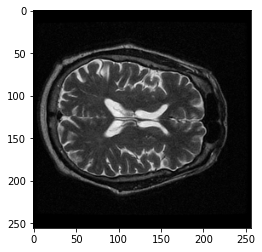

In [5]:
py.imshow(test[:,:,31,0], cmap='gray')

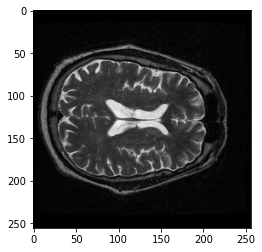

In [6]:
py.imshow(test[:,:,32,0], cmap='gray')

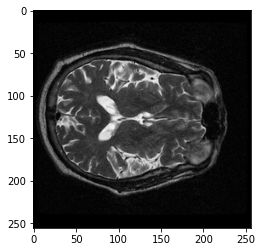

In [7]:
py.imshow(test[:,:,29,0], cmap='gray')

In [8]:
tsne = TSNE(init='pca')
data_red = pd.DataFrame(tsne.fit_transform(test[:,:,32,0]))

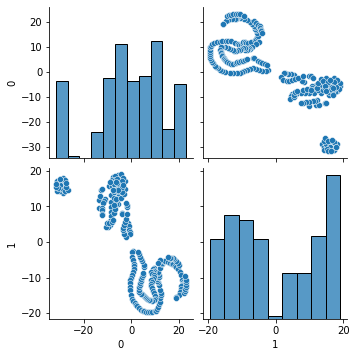

In [9]:
sb.pairplot(data_red)

3 or 2 Clusters !

In [25]:
def train(data):
  n_components = np.arange(2,10)
  gmm_models = [GaussianMixture(n).fit(data) for n in n_components]
  py.plot(n_components, [m.bic(data) for m in gmm_models], label='BIC')

In [20]:
def gaussian(trainset, clusters):  
    """
    Run Gaussian Mixture Model on the dataset
    :param trainset: Train DataSet
    :param clusters: number of clusters that KMeans groups the data to them
    :return: predicted labels of  training set, predicted labels of  testng set 
    """
    # tied : all components share the same general covariance matrix
    model = GaussianMixture(n_components=clusters)
    model.fit(trainset)
    preds = model.predict(trainset)
    
    print("silhouette score Train =", silhouette_score(trainset, preds))
    return preds

In [6]:
data = test[:,:,32,0].reshape(-1, 1)

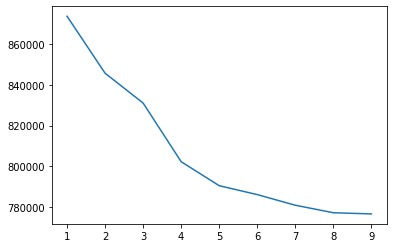

In [10]:
train(data)

In [17]:
labels_2 = gaussian(data, 2)
labels_9 = gaussian(data, 9)

silhouette score Train = 0.7430581722031404
silhouette score Train = 0.650371517316542


Using  `tied` covariance_type

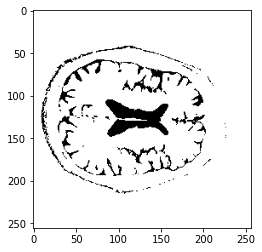

In [18]:
py.imshow(labels_2.reshape(256, 256), cmap='gray')

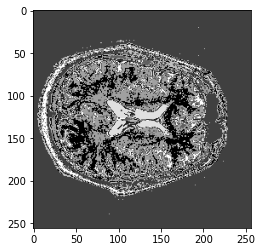

In [19]:
py.imshow(labels_9.reshape(256, 256), cmap='gray')

Using  `full` covariance_type

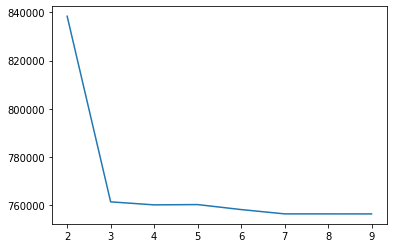

In [26]:
train(data)

In [27]:
labels_2_f = gaussian(data, 2)
labels_3_f = gaussian(data, 3)

silhouette score Train = 0.6917081425405917
silhouette score Train = 0.7103721241447921


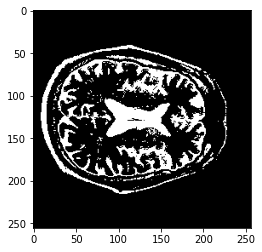

In [28]:
py.imshow(labels_2_f.reshape(256, 256), cmap='gray')

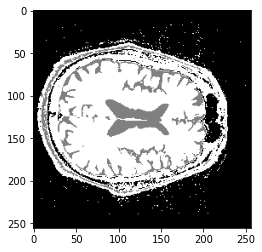

In [29]:
py.imshow(labels_3_f.reshape(256, 256), cmap='gray')

In [30]:
labels_4_f = gaussian(data, 4)

silhouette score Train = 0.7244939223237268


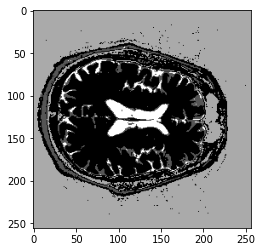

In [31]:
py.imshow(labels_4_f.reshape(256, 256), cmap='gray')

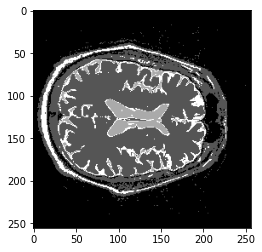

In [49]:
py.imshow(labels_4_f.reshape(256, 256), cmap='gray')

In [ ]:
noise = path + '/AD_T2/Field_Mapping/ADNI_003_S_6264_MR_Field_Mapping__raw_20180605145020935_1_S692135_I1005759.nii' # noised
good = path + '/AD_T2/Field_Mapping/ADNI_003_S_6264_MR_Field_Mapping__raw_20180605145020676_1_S692133_I1005756.nii' # good

(78, 78)

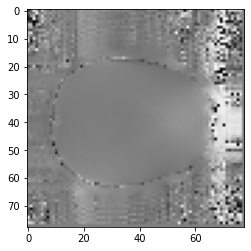

In [ ]:
noise = nib.load(noise).get_fdata()[:, :, 31, 0]
py.imshow(noise, cmap='gray')
noise.shape

(224, 224)

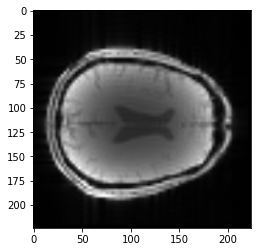

In [ ]:
good = nib.load(good).get_fdata()[:, :, 30, 0]
good = cv2.resize(good, (224, 224))
py.imshow(good, cmap='gray')
good.shape

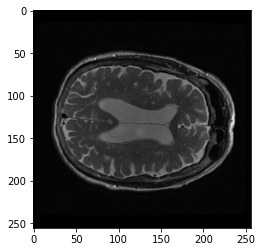

In [ ]:
img = nib.load('/content/drive/MyDrive/Graduation Project Repo/ADNI DataSet - Handled/MCI_T2/Axial_PD_T2_FSE/ADNI_002_S_0782_MR_Axial_PD_T2_FSE__br_raw_20081017201546336_2_S57624_I122114.nii').get_fdata()
py.imshow(img[:,:,7,0], cmap='gray')

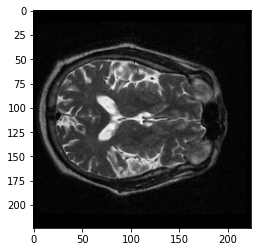

In [ ]:
py.imshow(data_list[0].reshape(224,224), cmap='gray')

In [ ]:
data_list = np.reshape(data_list, (-1, 50176))

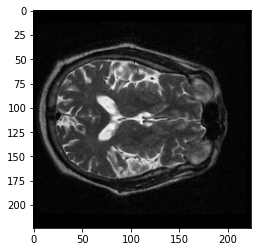

In [ ]:
py.imshow(data_list[0].reshape(224,224), cmap='gray')